<h1 style="color:green"><center><i>Dates and Fruits Classification</i></center></h1>

<h1 style="color:#88bddb"> Content</h1>

- 1.<a href="#1">Overview</a>
- 2.<a href="#2">Importing librarires</a>
- 3.<a href="#3">Load Dataset</a>
- 4.<a href="#4">Data Understanding</a>
- 5.<a href="#5">Data-Preprocessing</a>
- 6.<a href="#6">Modelling</a>

<a id="1"></a>
# 1.Overview

Dataset Abstract:</b> A great number of fruits are grown around the world, each of which has various types. The factors that determine the type of fruit are the external appearance features such as color, length, diameter, and shape. The external appearance of the fruits is a major determinant of the fruit type. Determining the variety of fruits by looking at their external appearance may necessitate expertise, which is time-consuming and requires great effort. The aim of this study is to classify the types of date fruit, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai by using three different machine learning methods. In accordance with this purpose, 898 images of seven different date fruit types were obtained via the computer vision system (CVS). Through image processing techniques, a total of 34 features, including morphological features, shape, and color, were extracted from these images. First, models were developed by using the logistic regression (LR) and artificial neural network (ANN) methods, which are among the machine learning methods. Performance results achieved with these methods are 91.0% and 92.2%, respectively. Then, with the stacking model created by combining these models, the performance result was increased to 92.8%. It has been concluded that machine learning methods can be applied successfully for the classification of date fruit types.

<a id="2"></a>
# 2. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

from xgboost import XGBClassifier

C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


**To Open XlX file we openpyxl**

In [2]:
pip install openpyxl

<a id="3"></a>
# 3.Load Dataset

In [4]:
data_path = "C:/Users/tswar/Downloads/SocialTek/Dates and Fruits/Date_Fruit_Datasets.xlsx"
data=pd.read_excel(data_path)

df = data.copy()

In [5]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


<a id="4"></a>
# 4.Data Understanding

In [6]:
def InfoData(dataframe,target_variable = None):
    
    print(f"""
== DATA INFO ==
* Shape: {dataframe.shape}
* Number of data = {dataframe.shape[0]}


== COLUMNS INFO ==
* Number of columns: {len(dataframe.columns)}
* Columns with dtype: 
{dataframe.dtypes}


== Missing / Nan Values ==
* Is there any missing value?: {dataframe.isnull().values.any()}
    """)
    
    if (target_variable != None) and (target_variable in dataframe.columns):    
        
        print(f"""
== TARGET VARIABLE ==

* Variable: {target_variable}
* Values of Variable: {" - ".join(df.Class.unique())}
* Count of Values: {len(df.Class.unique())}
""")
        
        
        
    elif (target_variable != None) and (target_variable not in dataframe.columns): 
        print("Please type correctly your target variable")
      

In [7]:
InfoData(df,"Class")


== DATA INFO ==
* Shape: (898, 35)
* Number of data = 898


== COLUMNS INFO ==
* Number of columns: 35
* Columns with dtype: 
AREA               int64
PERIMETER        float64
MAJOR_AXIS       float64
MINOR_AXIS       float64
ECCENTRICITY     float64
EQDIASQ          float64
SOLIDITY         float64
CONVEX_AREA        int64
EXTENT           float64
ASPECT_RATIO     float64
ROUNDNESS        float64
COMPACTNESS      float64
SHAPEFACTOR_1    float64
SHAPEFACTOR_2    float64
SHAPEFACTOR_3    float64
SHAPEFACTOR_4    float64
MeanRR           float64
MeanRG           float64
MeanRB           float64
StdDevRR         float64
StdDevRG         float64
StdDevRB         float64
SkewRR           float64
SkewRG           float64
SkewRB           float64
KurtosisRR       float64
KurtosisRG       float64
KurtosisRB       float64
EntropyRR          int64
EntropyRG          int64
EntropyRB          int64
ALLdaub4RR       float64
ALLdaub4RG       float64
ALLdaub4RB       float64
Class             objec

In [8]:
for i in df.columns[:-1]: # I dont want to / can not see last column("Class") because it is target variable and it is an object
    print(f"{i}: | Min: {df[i].min():.4f} | Max: {df[i].max():.4f} | Std: {df[i].std():.4f} | Mean: {(df[i].mean()):.4f}")

AREA: | Min: 1987.0000 | Max: 546063.0000 | Std: 107245.2053 | Mean: 298295.2071
PERIMETER: | Min: 911.8280 | Max: 2811.9971 | Std: 410.0125 | Mean: 2057.6610
MAJOR_AXIS: | Min: 336.7227 | Max: 1222.7230 | Std: 144.0593 | Mean: 750.8120
MINOR_AXIS: | Min: 2.2832 | Max: 766.4536 | Std: 114.2689 | Mean: 495.8728
ECCENTRICITY: | Min: 0.3448 | Max: 1.0000 | Std: 0.0887 | Mean: 0.7375
EQDIASQ: | Min: 50.2984 | Max: 833.8279 | Std: 119.5939 | Mean: 604.5779
SOLIDITY: | Min: 0.8366 | Max: 0.9974 | Std: 0.0182 | Mean: 0.9818
CONVEX_AREA: | Min: 2257.0000 | Max: 552598.0000 | Std: 108815.6569 | Mean: 303845.5924
EXTENT: | Min: 0.5123 | Max: 0.8562 | Std: 0.0537 | Mean: 0.7363
ASPECT_RATIO: | Min: 1.0653 | Max: 535.5257 | Std: 17.8208 | Mean: 2.1311
ROUNDNESS: | Min: 0.0048 | Max: 0.9773 | Std: 0.0708 | Mean: 0.8577
COMPACTNESS: | Min: 0.0411 | Max: 0.9681 | Std: 0.0622 | Mean: 0.8072
SHAPEFACTOR_1: | Min: 0.0017 | Max: 0.6154 | Std: 0.0205 | Mean: 0.0034
SHAPEFACTOR_2: | Min: 0.0011 | Max: 0.00

<a id="5"></a>
# 5.Data Preprocessing

In [9]:
# Label Encoding
le = LabelEncoder()
target = df['Class']
target = le.fit_transform(target)

In [10]:
X = df.drop("Class",axis=1)

In [11]:
train_test_split_params = {"test_size":0.33,
                        "random_state":1}

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, target,
                                                    test_size=train_test_split_params["test_size"],
                                                    random_state=train_test_split_params["random_state"],
                                                    shuffle=True)

In [13]:
print(f"""
X_train shape: {X_train.shape}
X_test shape: {X_test.shape}
y_train shape: {y_train.shape}
y_test shape: {y_test.shape}
""")


X_train shape: (601, 34)
X_test shape: (297, 34)
y_train shape: (601,)
y_test shape: (297,)



<a id="6"></a>
# 6.Modelling

#### Notes:
##### * I will use "RandomizeGridSearch" to select parameters
##### * I will use "StratifiedKFold" because we are dealing with imbalanced class distributions. (You can see below)

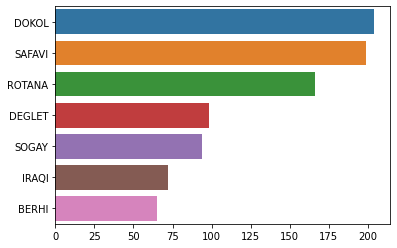

In [14]:
sns.barplot(y=df["Class"].value_counts().index,x=df["Class"].value_counts().values);

In [15]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'eval_metric': ["mlogloss"],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [0, 3, 4]
        }

In [16]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1)

randomized_search = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=5, cv=skf.split(X_train,y_train), verbose=3, random_state=1)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=0.240 total time=   0.7s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=0.233 total time=   0.2s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=0.233 total time=   0.3s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=0.233 total time=   0.2s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=0.242 total time=   0.2s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END colsample_bytree=0.6, eval_metric=mlogloss, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.868 total time=   1.2s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END colsample_bytree=0.6, eval_metric=mlogloss, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.925 total time=   1.6s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END colsample_bytree=0.6, eval_metric=mlogloss, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.892 total time=   1.3s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END colsample_bytree=0.6, eval_metric=mlogloss, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.892 total time=   1.2s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END colsample_bytree=0.6, eval_metric=mlogloss, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weight=1, subsample=0.8;, score=0.858 total time=   1.6s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.05, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.860 total time=   0.9s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.05, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.858 total time=   0.9s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.05, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.933 total time=   0.9s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.05, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.883 total time=   1.0s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.05, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.833 total time=   1.1s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.843 total time=   1.8s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.875 total time=   1.7s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.858 total time=   1.5s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.875 total time=   1.8s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.825 total time=   1.9s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=2, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.868 total time=   0.9s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=2, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.883 total time=   0.8s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=2, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.917 total time=   1.1s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=2, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.892 total time=   1.0s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=2, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.8;, score=0.858 total time=   1.6s


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002180B524C80>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           mi...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
   

In [17]:
print('Best hyperparameters:', randomized_search.best_params_)

Best hyperparameters: {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 1.5, 'eval_metric': 'mlogloss', 'colsample_bytree': 0.6}


In [18]:
xgb = XGBClassifier(subsample = randomized_search.best_params_["subsample"],
                      min_child_weight = randomized_search.best_params_["min_child_weight"],
                      max_depth = randomized_search.best_params_["max_depth"],
                      learning_rate = randomized_search.best_params_["learning_rate"],
                      gamma = randomized_search.best_params_["gamma"],
                      eval_metric = randomized_search.best_params_["eval_metric"],
                      colsample_bytree = randomized_search.best_params_["colsample_bytree"])

In [19]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eval_metric='mlogloss', gamma=1.5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
train_pred = xgb.predict(X_train)
train_acc = accuracy_score(y_train,train_pred)
print('Train Accuracy: ', train_acc)
 
test_pred = xgb.predict(X_test)
test_acc = accuracy_score(y_test,test_pred)
print('Test Accuracy:', test_acc)


Train Accuracy:  0.9900166389351082
Test Accuracy: 0.8686868686868687


C:\Users\tswar\anaconda3\TSWARUP\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
